# 必要なライブラリをimprot

In [35]:
import itertools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 3D-PCRの変数を定義

In [117]:
sample_size = (12, 8, 10)

## 実際のデータを使う用

In [123]:
mode = 'real data'
c_x = [1]
c_y = [1]
c_z = [1]
re_test = list(itertools.product(c_x, c_y, c_z))
re_test_index = [j+max(i-1, 0)*sample_size[1]+sample_size[0]*sample_size[1]*k for i, j, k in re_test]

## シミュレーション用

In [118]:
mode = 'simulation data'

# sample_size = (5, 3, 4)
positive_sample_num = 5

samples = np.zeros(sample_size, dtype='bool')
indices = np.random.choice(np.prod(sample_size), positive_sample_num, replace=False)
np.put(samples, indices, True)

c_x = np.where(np.any(samples, axis = (1, 2)))[0].tolist()
c_y = np.where(np.any(samples, axis = (0, 2)))[0].tolist()
c_z = np.where(np.any(samples, axis = (0, 1)))[0].tolist()
re_test = list(itertools.product(c_x, c_y, c_z))
re_test_index = [j+max(i-1, 0)*sample_size[1]+sample_size[0]*sample_size[1]*k for i, j, k in re_test]

# 再テストが必要なwellを可視化

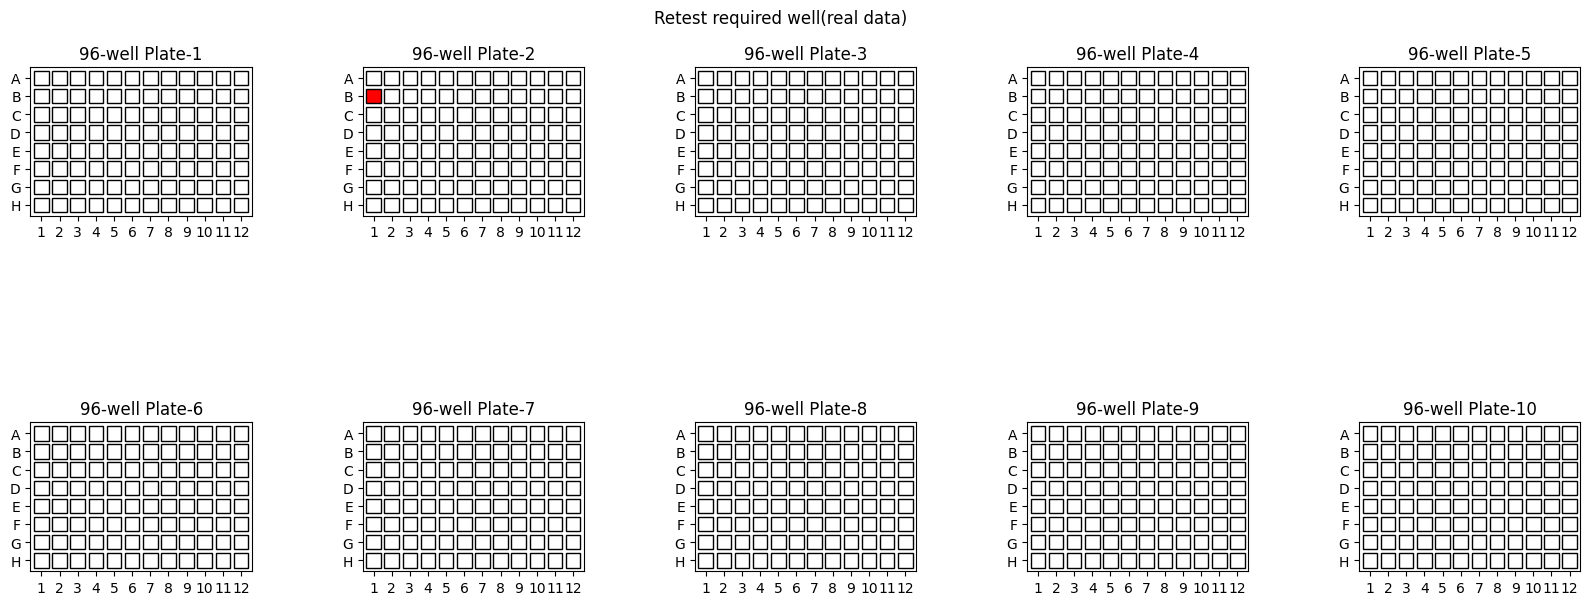

In [124]:
fig = plt.figure(figsize=(20, 20))
cnt = 0

for well_number in range(1, sample_size[2]+1):
    ax = fig.add_subplot(2, 5, well_number)
    well_size = 0.8
    
    for i in range(sample_size[0]):
        for j in range(sample_size[1]):
            if cnt in re_test_index:
                color = 'red'
            else:
                color = 'white'
            rect = patches.Rectangle((i+0.1, 7-j+0.1), well_size, well_size, linewidth=1, edgecolor='black', facecolor=color)
            ax.add_patch(rect)

            cnt += 1
    
    ax.set_xticks([i + 0.5 for i in range(12)])
    ax.set_xticklabels([str(i + 1) for i in range(12)])
    
    ax.set_yticks([i + 0.5 for i in range(8)])
    ax.set_yticklabels(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'][::-1])  # Y軸のラベルは逆順
    
    ax.set_xlim(-0.1, 12.1)
    ax.set_ylim(-0.1, 8.1)
    
    ax.set_aspect('equal', 'box')
    
    ax.set_title(f'{sample_size[0] * sample_size[1]}-well Plate-{well_number}')

fig.suptitle(f'Retest required well({mode})', y=0.65)
fig.subplots_adjust(wspace=0.5, hspace=-0.7)